# TP n°1 des modules RT2R05 et R2R06 
 Jalain Enzo & Treard Louis (RT1 FI A2 - 2024)
 


## 1. Analyse de signaux périodiques 

### De la transformé de Fourier à la FFT

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


$$x(t) = 1.\cos(2\pi . 1000 . t)
$$

**7. Préciser l'amplitude du signal :**
_L'amplitude du signal est 1_ $$\color{red}1 \color{reset} .\cos(2\pi . 1000 . t) $$

**8. Modéliser ce signal qu'on appellera y(t) comme le produit d'une porte et d'un cosinus** : $$ y(t) = \Pi_{T_0} . x(t) $$

**9. En déduire la transformé de fourier du signal :**  $$ Y(f) = T_0 . sinc(\pi . f . T_0)\ \ \  * \ \ \  \frac{1}{2} [\delta (f+f_0) + \delta (f-f_0) ] $$

$$ Y(f) = T_0 . sinc(f + 1000) + T_0 . sinc(f - 1000)$$

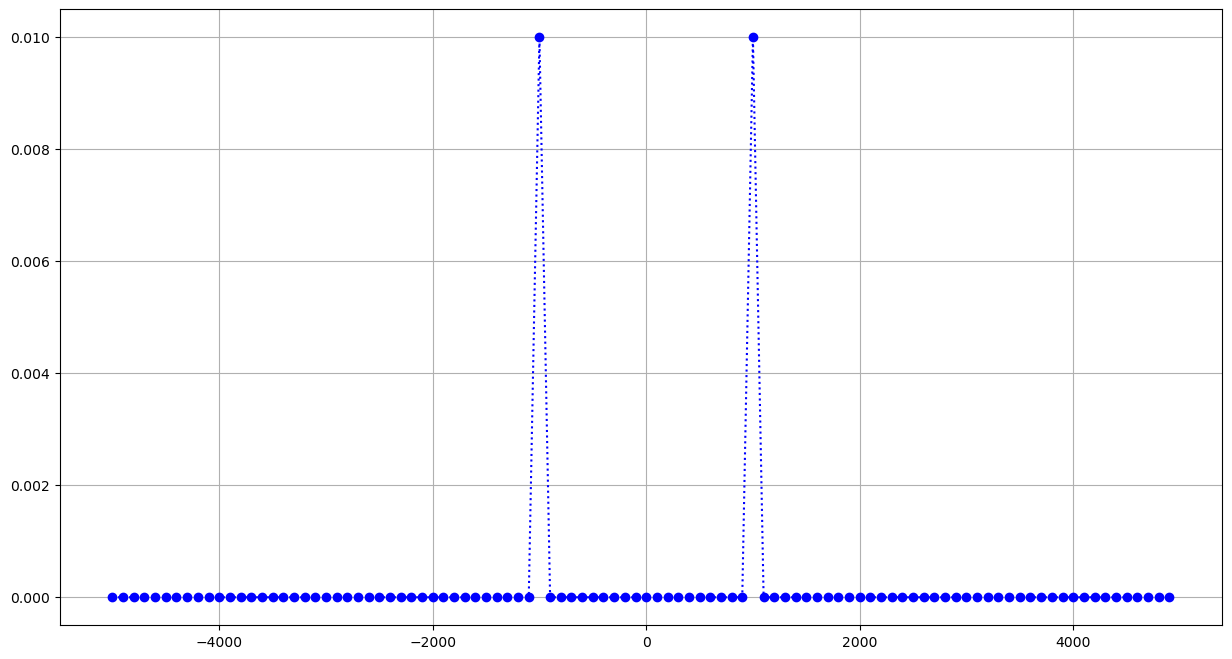

In [9]:
centre = 5
largeur = 10
frequence= np.arange(-5000, 5000, 100)
T0 = 10e-3
Y_theorique = T0*np.sinc(frequence+1000) + T0*np.sinc(frequence-1000)


fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(frequence, Y_theorique, 'b:o')
ax.grid()


### Création du signal sinusoidal entre -5ms et 5 ms

In [25]:
start = -5e-3
stop = 5e-3
tfft = stop-start
te = 1e-4
fe = 1/te
f0 = 1000
temps = np.arange(start, stop, te)

y = np.sin(2*np.pi*f0*temps)
N = len(y)


14. il faut mutliplier la fft par $\frac{1}{N}$ pour retrouver la fonction dans le domaine temporelle

In [37]:
#Cacul de la FFT bilatérale
Y_pratique = tfft/N*np.fft.fftshift(np.fft.fft(y))
#Module de la FFT
Y_abs = np.abs(Y_pratique)

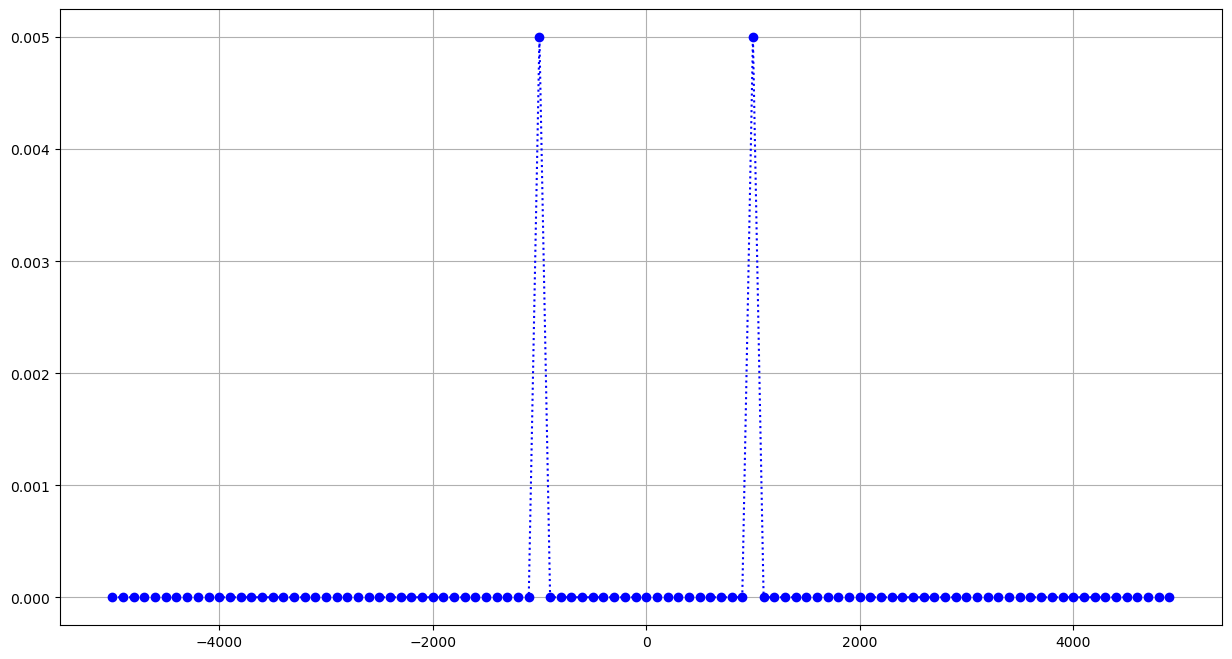

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(frequence, Y_abs, 'b:o')
ax.grid()

16. Pour retrouver la fréquence d'échantillonnage avec la période on utilise : $\frac{1}{Te}$. Ensuite pour avoir le nombre de points N sur la durée du signal on utilise $(tfft*Fe)$ avec tfft la durée du signal. La plage de fréquence du signal est un vecteur compris entre $\frac{-fe}{2}$ et $\frac{fe}{2}$ par pas de $\frac{fe}{N}$. On donne ensuite la résolution en fréquence $ RBW = \frac{1}{tfft}$ avec tfft la durée du signal.

In [39]:
# Fréquence d'échantillonnage :
fe = 1/te
# Nombre de points sur la durée du signal
N = (tfft*fe)
# plage de fréquence du signal
f = np.arange(-fe/2, fe/2, fe/N)
# RBW
RBW = 1/tfft 


### Tracé de la FFT sur RBW

In [40]:
# Signal de la FFT sur RBW
Y_pratique = 1/RBW*np.fft.fftshift(np.fft.fft(y))
# Module de la FFT sur RBW
Y_abs = np.abs(Y_pratique)

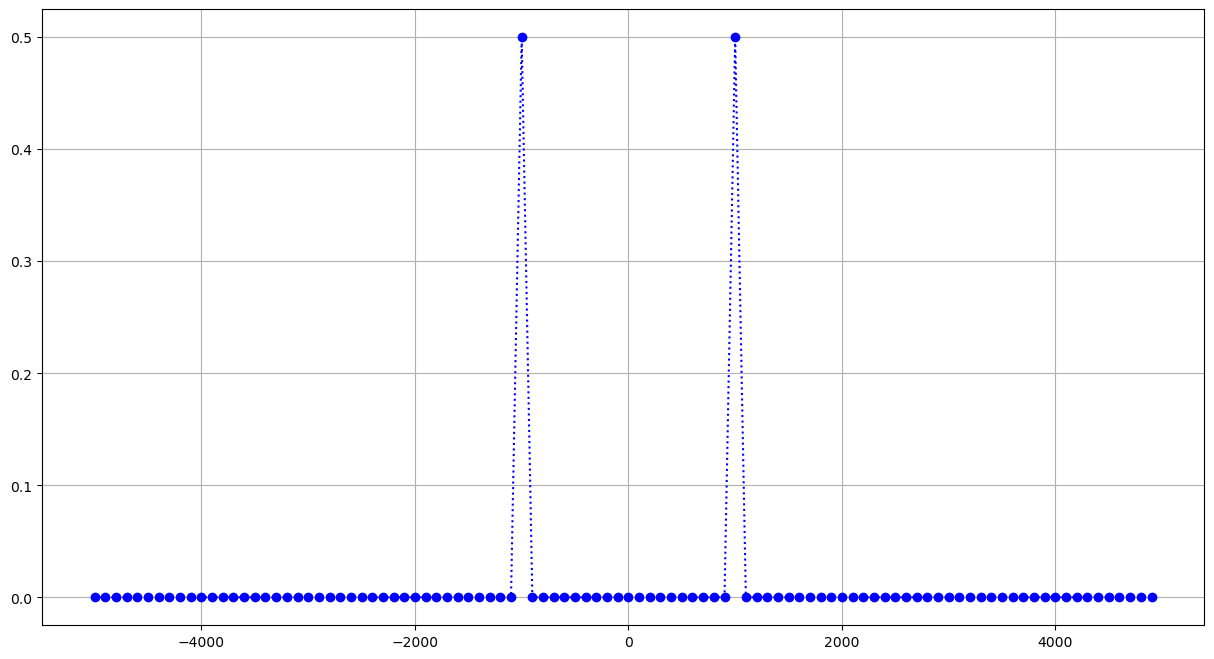

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(frequence, Y_abs, 'b:o')
ax.grid()

## 2. Affichage en Volt efficace et en dBm sur les appareils de mesures

### Calcul de la $DST_{eff_{k}}$ et $DST_{dB{k}}$

In [50]:
# Calcul du nombre de points
N = len(y)
tfft = N*te

#Calcul de la FFT bilatérale
Y_signal = 1/N*(np.fft.fft(y))

#Calcul de la FFT Mono latérale
Y_signal_mono = np.concatenate((Y_signal[0:1], 2*Y_signal[1:int(N/2)]))
Y_mod = np.abs(Y_signal_mono)


# Calcul de la Densité spectrale en Volt efficace sur RBW
Y_eff = Y_mod/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
Y_dBm = 10*np.log10(np.square(Y_eff)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f = np.arange(0, fe/2, fe/N)


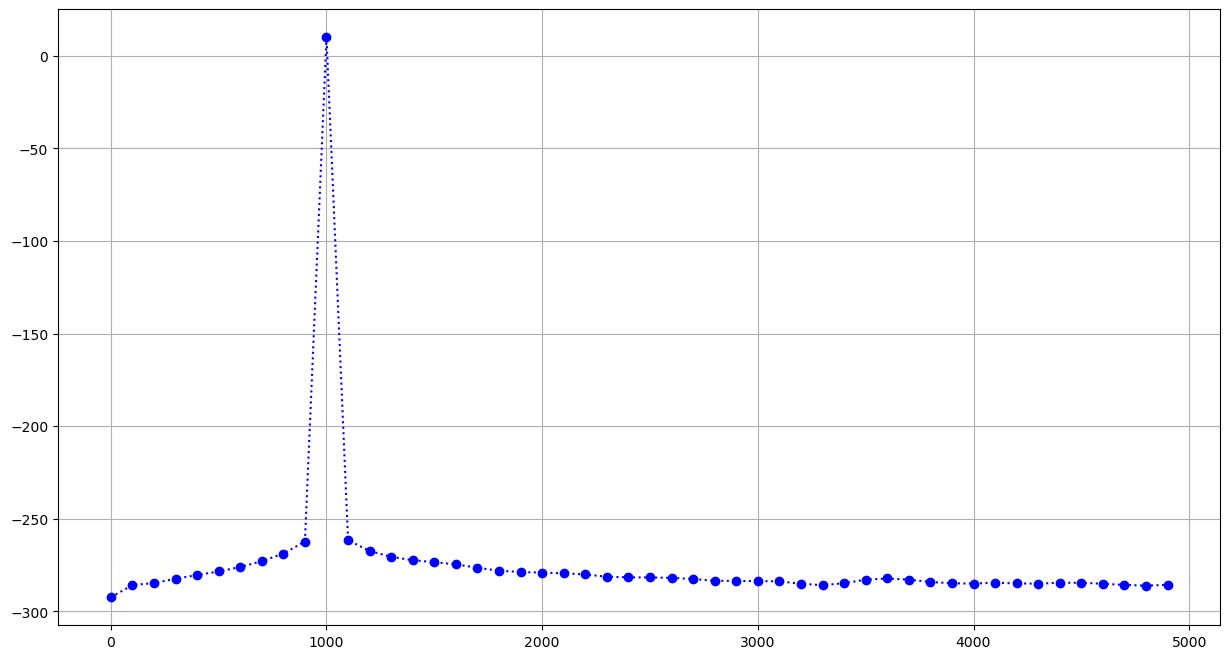

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(f, Y_dBm, 'b:o')
ax.grid()

In [53]:
# Analyse des valeurs à 1000 hz en Volt sur RBW et en dBm sur RBW
max_Y_pratique = np.max(Y_pratique)
max_Y_dBm = 10*np.log10(np.square(max_Y_pratique)/50*1000)

# Affichage des modules des valeurs à 1000 hz en Volt sur RBW et en dBm sur RBW

print(np.abs(max_Y_pratique))
print(np.abs(max_Y_dBm))

0.49999999999999944
15.32997684891944
